<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

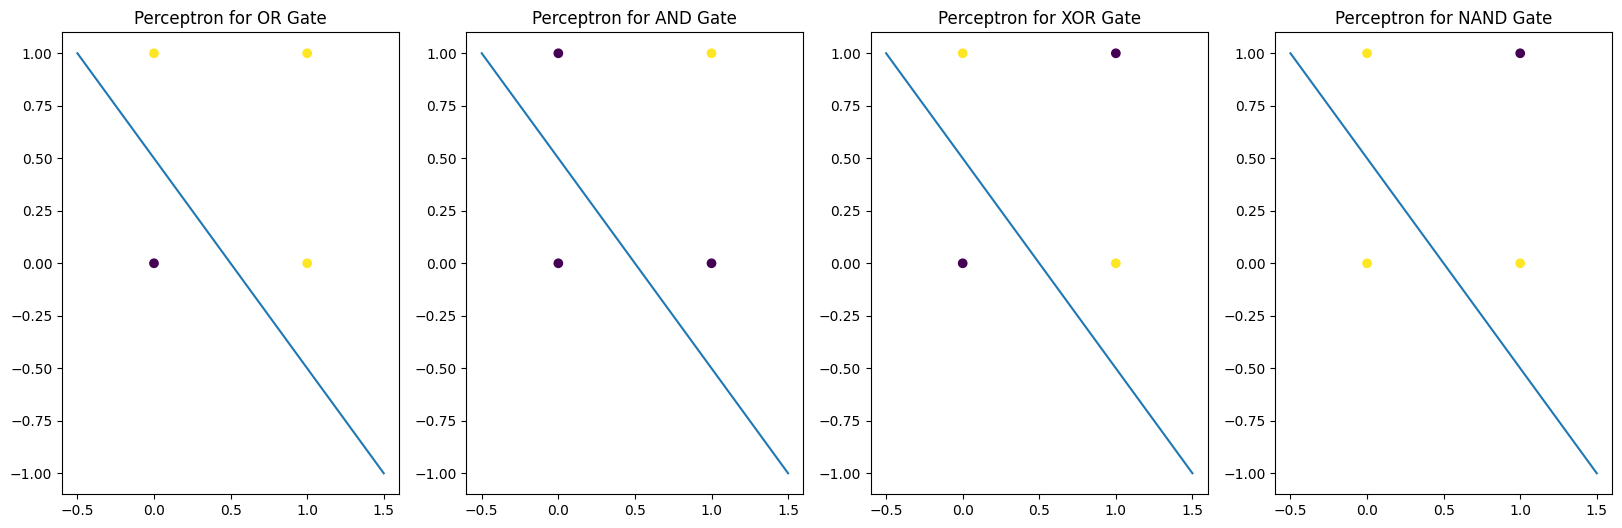

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

class Perceptron:
    def __init__(self, weights):
        self.weights = weights
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation >= 0 else 0

# Defining the inputs and labels for the gates
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_OR = np.array([0, 1, 1, 1])
labels_AND = np.array([0, 0, 0, 1])
labels_XOR = np.array([0, 1, 1, 0])
labels_NAND = np.array([1, 1, 1, 0])

# Initializing the weights for the perceptrons
weights = np.array([-0.5, 1, 1])

# Creating the perceptrons
perceptron_OR = Perceptron(weights)
perceptron_AND = Perceptron(weights)
perceptron_XOR = Perceptron(weights)
perceptron_NAND = Perceptron(weights)

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Plotting the decision boundaries for OR gate
x = np.linspace(-0.5, 1.5, 10)
y_OR = (-perceptron_OR.weights[0] - perceptron_OR.weights[1] * x) / perceptron_OR.weights[2]

ax[0].plot(x, y_OR)
ax[0].scatter(inputs[:, 0], inputs[:, 1], c=labels_OR)
ax[0].set_title('Perceptron for OR Gate')


# Plotting the decision boundaries for AND gate
y_AND = (-perceptron_AND.weights[0] - perceptron_AND.weights[1] * x) / perceptron_AND.weights[2]

ax[1].plot(x, y_AND)
ax[1].scatter(inputs[:, 0], inputs[:, 1], c=labels_AND)
ax[1].set_title('Perceptron for AND Gate')


# Plotting the decision boundaries for XOR gate
y_XOR = (-perceptron_XOR.weights[0] - perceptron_XOR.weights[1] * x) / perceptron_XOR.weights[2]

ax[2].plot(x, y_XOR)
ax[2].scatter(inputs[:, 0], inputs[:, 1], c=labels_XOR)
ax[2].set_title('Perceptron for XOR Gate')


# Plotting the decision boundaries for NAND gate
y_NAND = (-perceptron_NAND.weights[0] - perceptron_NAND.weights[1] * x) / perceptron_NAND.weights[2]

ax[3].plot(x, y_NAND)
ax[3].scatter(inputs[:, 0], inputs[:, 1], c=labels_NAND)
ax[3].set_title('Perceptron for NAND Gate')

plt.show()

PERCEPTRON LEARNING ALGORITHM

The Perceptron was created with keeping human neuron in mind. The Perceptron algorithm is one of the most fundamental algorithms that was introduced after the shortcomings of McCulloch Pitts Neuron were discovered.

This is how the Perceptron Algorithm works:

Initialization: Start by initializing the weights and bias to small random values or zeros.

Forward Pass: For each training example, compute the weighted sum of the inputs and the bias:

[ z = summation( w_i * x_i) + b ] where w_i are the weights, x_i are the inputs, and b is the bias.

Activation Function: Apply an activation function to the weighted sum to get the output of the perceptron: y = f(z) where ( f(z)) is the activation function.

Error Calculation: Calculate the error between the predicted output and the true label: [ e = y_{true} - y_{pred} ]

Weight Update: Update the weights and bias using the perceptron learning rule: [ w_i = w_i + \alpha \cdot e \cdot x_i ] [ b = b + \alpha \cdot e ] where ( \alpha ) is the learning rate, ( e ) is the error, and ( x_i ) are the inputs.

Repeat: Repeat steps 2-5 for all training examples.

Convergence: Repeat steps 2-6 for a fixed number of epochs or until the error is below a certain threshold.

Final Weights and Bias: The final weights and bias are the parameters of the trained perceptron.

Prediction: Use the trained perceptron to make predictions on new data by following steps 2-3.

Evaluation: Evaluate the performance of the trained perceptron on a test set to measure its accuracy and generalization ability.

Perceptron without any Learning Rule

Perceptron with initial weights set by us. As we can see many of the decision boundaries were not correctly identified by the perceptron algorithm. Hence we introduce learning rule so that the weights get updated automatically and minimise the error

In [2]:
class Perceptron:
  def __init__(self,weights,bias):
    self.weights = None
    self.bias = None
  def activation_function(self,predict):
    return np.heaviside(predict, 0)
  def predict(self,X):
    z = np.dot(X,self.weights) + self.bias
    return self.activation_function(z)
  def learn(self,X,weights,y,learning_rate,epochs):
    n = X.shape[1]
    # Initialising all weights and bias to zero
    self.weights = np.zeros(n)
    self.bias = 0
    for _ in range(epochs):
      for i in range(len(X)):
        y_pred = self.predict(X)
        self.weights = self.weights + learning_rate*(y[i]-y_pred[i])*X[i]
        self.bias = self.bias + learning_rate*(y[i]-y_pred[i])
    print("Training Complete. Final Weights:",self.weights,"Final Bias:",self.bias)
    print("Expected",y)
    print("Predicted",y_pred)
    print("Error",(y-y_pred))
def main():
  boolean_functions = {
        "AND": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 0, 0, 1])},
        "OR": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 1, 1, 1])},
        "NAND": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([1, 1, 1, 0])},
        "XOR": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 1, 1, 0])}
    }
  w = [0.5,0.3]
  b = 0.5
  for function, data in boolean_functions.items():
    print("Boolean function:", function)
    perceptron = Perceptron(w,b)
    perceptron.learn(data["data"],w, data["labels"],0.1,10)
    print()

if __name__ == "__main__":
  main()

Boolean function: AND
Training Complete. Final Weights: [0.2 0.1] Final Bias: -0.2
Expected [0 0 0 1]
Predicted [0. 0. 0. 1.]
Error [0. 0. 0. 0.]

Boolean function: OR
Training Complete. Final Weights: [0.1 0.1] Final Bias: 0.0
Expected [0 1 1 1]
Predicted [0. 1. 1. 1.]
Error [0. 0. 0. 0.]

Boolean function: NAND
Training Complete. Final Weights: [-0.2 -0.1] Final Bias: 0.20000000000000004
Expected [1 1 1 0]
Predicted [1. 1. 1. 0.]
Error [0. 0. 0. 0.]

Boolean function: XOR
Training Complete. Final Weights: [-0.1  0. ] Final Bias: 0.1
Expected [0 1 1 0]
Predicted [1. 1. 1. 1.]
Error [-1.  0.  0. -1.]



Perceptron Learning Algorithm

We see that there are no errors for the linearly seperable gates such as AND, OR and NAND gates after enough iterations, but logical gates such as XOR can never be seperated by perceptron because they are non-linear

In [3]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def activation_function(self, predict):
        return np.heaviside(predict, 0)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation_function(z)

    def learn(self, X, y, learning_rate, epochs):
        n_samples, n_features = X.shape
        self.weights = np.array(self.weights)
        print("Training started...")
        print("-" * 30)
        for epoch in range(epochs):
          for i in range(len(X)):
            y_pred = self.predict(X)
            error = y - y_pred
            self.weights = self.weights + learning_rate*(y[i]-y_pred[i])*X[i]
            self.bias = self.bias + learning_rate*(y[i]-y_pred[i])

          print(f"Iteration {epoch + 1}:")
          print("Errors:".ljust(15), error)
          print("Weights:".ljust(15), self.weights)
          print("Bias:".ljust(15), self.bias)
          print("Predicted Values:".ljust(15), y_pred)
          print("-" * 30)

        print("Training Complete.")
        print("-" * 30)
        print("Final Weights:".ljust(15), self.weights)
        print("Final Bias:".ljust(15), self.bias)
        print("Expected".ljust(15), y)
        print("Predicted".ljust(15), y_pred)
        print("Error".ljust(15), (y - y_pred))

def main():
    boolean_functions = {
        "AND": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 0, 0, 1])},
        "OR": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 1, 1, 1])},
        "NAND": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([1, 1, 1, 0])},
        "XOR": {"data": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), "labels": np.array([0, 1, 1, 0])}
    }

    w = [0.5, 0.3]
    b = 0.5
    for function, data in boolean_functions.items():
        print("Boolean function:", function)
        perceptron = Perceptron(w, b)
        perceptron.learn(data["data"], data["labels"], 0.1, 10)
        print()

if __name__ == "__main__":
    main()

Boolean function: AND
Training started...
------------------------------
Iteration 1:
Errors:         [-1. -1. -1.  0.]
Weights:        [0.4 0.2]
Bias:           0.20000000000000004
Predicted Values: [1. 1. 1. 1.]
------------------------------
Iteration 2:
Errors:         [ 0.  0. -1.  0.]
Weights:        [0.3 0.1]
Bias:           -0.09999999999999998
Predicted Values: [0. 0. 1. 1.]
------------------------------
Iteration 3:
Errors:         [ 0.  0. -1.  0.]
Weights:        [0.2 0.1]
Bias:           -0.19999999999999998
Predicted Values: [0. 0. 1. 1.]
------------------------------
Iteration 4:
Errors:         [0. 0. 0. 1.]
Weights:        [0.2 0.2]
Bias:           -0.19999999999999998
Predicted Values: [0. 0. 0. 0.]
------------------------------
Iteration 5:
Errors:         [0. 0. 0. 0.]
Weights:        [0.1 0.2]
Bias:           -0.3
Predicted Values: [0. 0. 0. 1.]
------------------------------
Iteration 6:
Errors:         [0. 0. 0. 0.]
Weights:        [0.1 0.2]
Bias:           -0

GRADIENT DESCENT ALGORITHM FOR LOCATING THE GLOBAL MINIMA

The gradient descent algorithm is a first-order optimization algorithm that is used to find the minimum of a function. A stepwise approach on how the gradient descent algorithm is used to find the global minimum of the univariate function ( f(x) = x^2 - 2x ) is given:

Define the function: The first step is to define the function whose minimum we want to find. In this case, the function is ( f(x) = x^2 - 2x ).

Define the derivative of the function: The derivative of the function is used to determine the direction of the steepest ascent or descent. In this case, the derivative of the function is ( f'(x) = 2x - 2 ).

Choose an initial guess: The gradient descent algorithm starts with an initial guess for the minimum value of the function. This guess can be any value within the domain of the function. In this case, let's choose an initial guess of ( x = 0 ).

Choose a learning rate: The learning rate determines the size of the steps taken by the algorithm in the direction of the negative gradient. A smaller learning rate results in smaller steps and a larger learning rate results in larger steps. In this case, let's choose a learning rate of ( \alpha = 0.1 ).

Choose a stopping criterion: The stopping criterion determines when the algorithm should stop. This can be based on the change in the value of the function or the change in the value of the variable. In this case, let's choose a stopping criterion of ( \epsilon = 1e-6 ), which means that the algorithm should stop when the change in the value of the variable is very small.

Perform Gradient Descent: The gradient descent algorithm iteratively updates the guess for the minimum value of the function until the stopping criterion is met. The update rule is given by:

[ x_{\text{new}} = x_{\text{old}} - \alpha \cdot f'(x_{\text{old}}) ]

where ( x_{\text{old}} ) is the current guess for the minimum value of the function, ( x_{\text{new}} ) is the updated guess, ( \alpha ) is the learning rate, and ( f'(x_{\text{old}}) ) is the derivative of the function at the current guess.

Check the stopping criterion: After each iteration, the algorithm checks whether the stopping criterion is met. If it is, the algorithm stops and returns the current guess for the minimum value of the function. Otherwise, it continues to the next iteration.

Return the minimum value: After the algorithm stops, it returns the current guess for the minimum value of the function.

In [4]:
def equation(x):
    return x**2 - 2*x + 2

def derivative(x):
    return 2*x - 2

def gradient_descent(learning_rate, initial_guess, threshold):
    x = initial_guess
    iterations = 0
    path = [(x, equation(x))]

    while True:
        gradient = derivative(x)
        x_new = x - learning_rate * gradient
        if abs(x_new - x) < threshold:
            break
        x = x_new
        path.append((x, equation(x)))
        iterations += 1
    return path, iterations

# Parameters
learning_rate = 0.1
initial_guess = 0.0
threshold = 1e-6

path, iterations = gradient_descent(learning_rate, initial_guess, threshold)

fig = go.Figure()

x_values = np.linspace(-2, 6, 100)
y_values = equation(x_values)
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Function'))

x_path, y_path = zip(*path)
fig.add_trace(go.Scatter(x=x_path, y=y_path, mode='markers+lines', name='Gradient Descent Path'))

# Print the result
print("Global minimum is at:", path[-1][0])
print("Number of iterations:", iterations)

fig.show()

Global minimum is at: 0.9999953231947606
Number of iterations: 55


A stepwise approach on how gradient descent algorithm can be used to find the global minima of the bivariate function (f(x, y) = (1 - x)^2 + 100(y - x^2)^2)is provided:

Define the function: The first step is to define the function whose minimum we want to find. In this case, the function is (f(x, y) = (1 - x)^2 + 100(y - x^2)^2).

Define the partial derivatives of the function: The partial derivatives of the function give us the direction of the steepest ascent or descent at a given point. In this case, the partial derivatives of the function are:

(f_x(x, y) = -2(1 - x) - 400x(y - x^2))
(f_y(x, y) = 200(y - x^2))
Choose an initial guess: The next step is to choose an initial guess for the minimum value of the function. This can be any value within the domain of the function. In this case, let's choose an initial guess of (x = 0) and (y = 0).

Compute the gradient: Compute the gradient of the function at the initial guess. The gradient is the vector of partial derivatives evaluated at the initial guess. In this case, the gradient is:

(f_x(0, 0) = -2(1 - 0) - 400(0)(0 - 0^2) = -2)
(f_y(0, 0) = 200(0 - 0^2) = 0)
Update the guess: Update the guess for the minimum value of the function using the gradient descent update rule:

(x_{new} = x_{old} - \alpha \cdot f_x(x_{old}, y_{old}))
(y_{new} = y_{old} - \alpha \cdot f_y(x_{old}, y_{old})), where (\alpha) is the learning rate. In this case, let's choose a learning rate of (\alpha = 0.001). The updated guess is:
(x_{new} = 0 - 0.001 \cdot (-2) = 0.002)
(y_{new} = 0 - 0.001 \cdot (0) = 0)
Repeat steps 4 and 5: Repeat steps 4 and 5 until the change in the guess is very small. In this case, we can stop when the change in the guess is less than a threshold value, say (10^{-6}).

Output the result: The final guess is the minimum value of the function.

In [5]:
def equation(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def partial_derivative_x(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def partial_derivative_y(x, y):
    return 200 * (y - x**2)

def gradient_descent(learning_rate, initial_guess, threshold):
    x, y = initial_guess
    iterations = 0

    while True:
        gradient_x = partial_derivative_x(x, y)
        gradient_y = partial_derivative_y(x, y)
        x_new = x - learning_rate * gradient_x
        y_new = y - learning_rate * gradient_y
        if np.linalg.norm([x_new - x, y_new - y]) < threshold:
            break

        x, y = x_new, y_new
        iterations += 1

    return x, y, iterations

# Parameters
learning_rate = 0.001
initial_guess = (0.5, 0.5)
threshold = 1e-6

# Perform Gradient Descent
x_min, y_min, iterations = gradient_descent(learning_rate, initial_guess, threshold)

# Create a grid of x and y values
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Calculate the function values and gradient vectors at each point
z_values = equation(x_grid, y_grid)
gradient_x_values = partial_derivative_x(x_grid, y_grid)
gradient_y_values = partial_derivative_y(x_grid, y_grid)

# Create a 3D surface plot of the function
fig = go.Figure(data=[go.Surface(x=x_grid, y=y_grid, z=z_values)])

# Add the gradient vectors as quiver arrows
fig.add_trace(go.Scatter3d(x=x_grid.flatten(),y=y_grid.flatten(),z=z_values.flatten(),mode='markers',marker=dict(size=2,color='red',),name='Gradient Vectors'))

# Add the global minimum as a point on the graph
fig.add_trace(go.Scatter3d(x=[x_min],y=[y_min],z=[equation(x_min, y_min)],mode='markers',marker=dict(size=5,color='green',),name='Global Minimum'))

# Print the result
print("Global minimum is at:", (x_min, y_min))
print("Number of iterations:", iterations)

fig.show()

Global minimum is at: (0.9988833096707787, 0.9977633947902955)
Number of iterations: 13212
